In [61]:
import os
import pandas as pd
from sklearn.metrics import  mean_absolute_error
import matplotlib.pyplot as plt

In [108]:
train_endo_relative_path = os.path.join('..', 'data', 'train_endo.csv')
train_exo_relative_path = os.path.join('..', 'data', 'train_exo.csv')
test_relative_path = os.path.join('..', 'data', 'test.csv')

df1=pd.read_csv(train_endo_relative_path, parse_dates=True).set_index('Date')
df2=pd.read_csv(train_exo_relative_path, parse_dates=True).set_index('Date')
test=pd.read_csv(test_relative_path, parse_dates=True).set_index('Date')

In [63]:
test.head()

,Weekly_Sales
Date,
2012-04-13,2057637.86
2012-04-20,1955689.12
2012-04-27,1970121.65
2012-05-04,1995994.51
2012-05-11,2080764.17


In [64]:
df_val=df1.copy()

In [65]:
from statsmodels.tsa.arima.model import ARIMA   
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
df1.head()

,Weekly_Sales
Date,
2010-02-05,1967220.53
2010-02-12,2030933.46
2010-02-19,1970274.64
2010-02-26,1817850.32
2010-03-05,1939980.43


<Axes: xlabel='Date'>

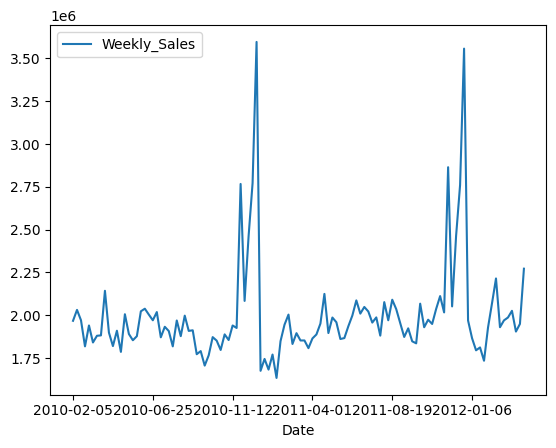

In [67]:
df1.plot()

# Exponential smoothing

## SimpleExpSmoothing

In [68]:
model1=SimpleExpSmoothing(df1.Weekly_Sales)
ses=model1.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
df_val['SES'] = ses.fittedvalues

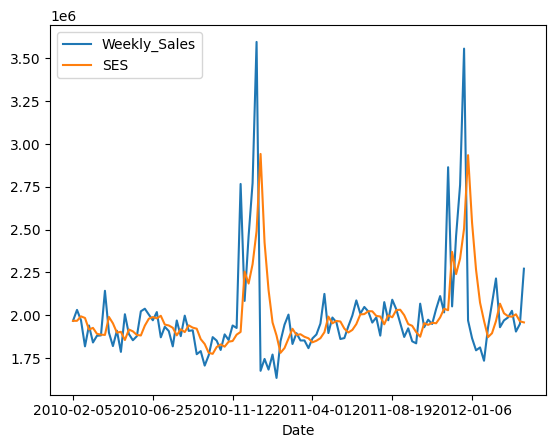

In [70]:
df_val[['Weekly_Sales', 'SES']].plot()
plt.show()

## DoubleExpSmoothing

In [71]:
model1_1=ExponentialSmoothing(df1.Weekly_Sales,trend='add')
des=model1_1.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
df_val['DES'] = des.fittedvalues

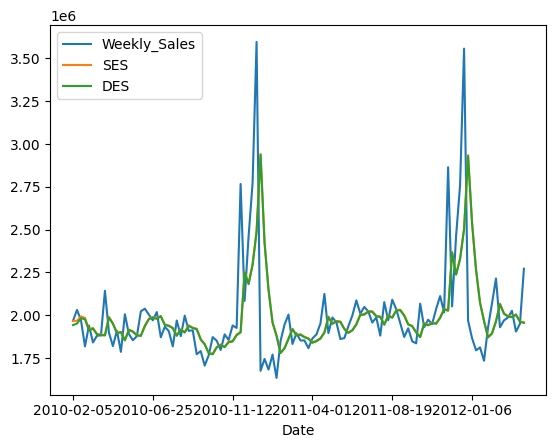

In [73]:
df_val[['Weekly_Sales','SES','DES']].plot()
plt.show()

## TripleExpSmoothing

In [74]:
model1_2=ExponentialSmoothing(df1.Weekly_Sales,trend='add',seasonal='add')
tes=model1_2.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [111]:
df_val['TES'] = tes.fittedvalues

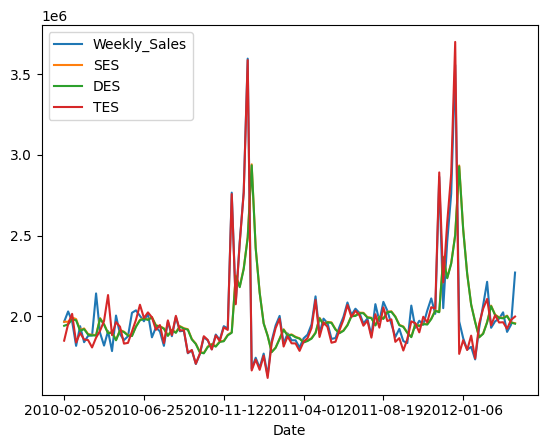

In [112]:
df_val[['Weekly_Sales','SES','DES','TES']].plot()
plt.show()

# Arima

In [77]:
model2 = ARIMA(df1.Weekly_Sales, order=(1, 0, 2))
ar_fit=model2.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [78]:
ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1580.947
Date:                Fri, 22 Dec 2023   AIC                           3171.894
Time:                        16:59:47   BIC                           3185.575
Sample:                    02-05-2010   HQIC                          3177.446
                         - 04-06-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.994e+06   5.96e+04     33.436      0.000    1.88e+06    2.11e+06
ar.L1         -0.6978      0.106     -6.558      0.000      -0.906      -0.489
ma.L1          1.2232      0.094     13.070      0.000       1.040       1.407
ma.L2          0.6331      0.047     13.411      0.000       0.541       0.726
sigma2      7.409e+10      0.271   2.73e+11      0.000    7.41e+10    7.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               159.45
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               6.68   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+33. Standard errors may be unstable.
"""

In [79]:
df_val['ARIMA'] = ar_fit.predict()


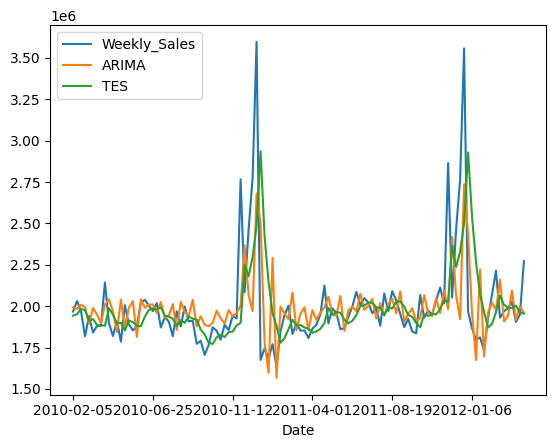

In [80]:
df_val[['Weekly_Sales', 'ARIMA','TES']].plot()
plt.show()

# Sarima

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

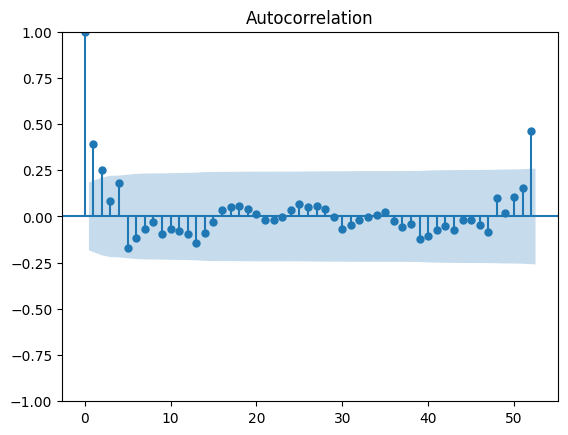

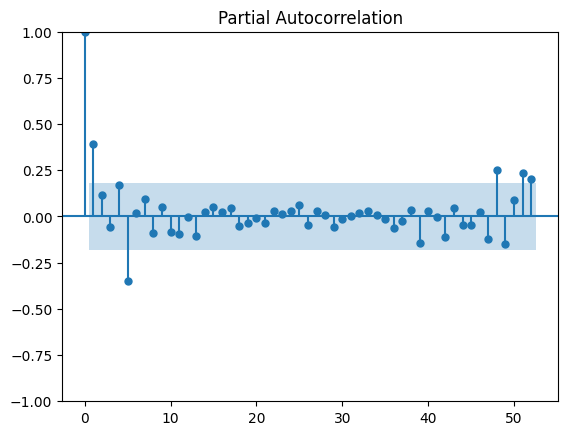

In [82]:
plot_acf(df1,lags=52)  
plot_pacf(df1,lags=52)
plt.show()

In [83]:
model3 = SARIMAX(df1.Weekly_Sales, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
sar_fit=model3.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [84]:
sar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1579.018
Date:                            Fri, 22 Dec 2023   AIC                           3168.036
Time:                                    16:59:49   BIC                           3181.717
Sample:                                02-05-2010   HQIC                          3173.589
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9922      0.029     34.762      0.000       0.936       1.048
ma.L1         -0.5612      0.125     -4.502      0.000      -0.805      -0.317
ar.S.L52       0.6098      2.157      0.283      0.777      -3.618       4.837
ma.S.L52      -0.0018      3.430     -0.001      1.000      -6.724       6.720
sigma2      8.958e+10   6.23e-11   1.44e+21      0.000    8.96e+10    8.96e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               616.51
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+37. Standard errors may be unstable.
"""

In [85]:
df_val['SARIMA'] = sar_fit.predict()

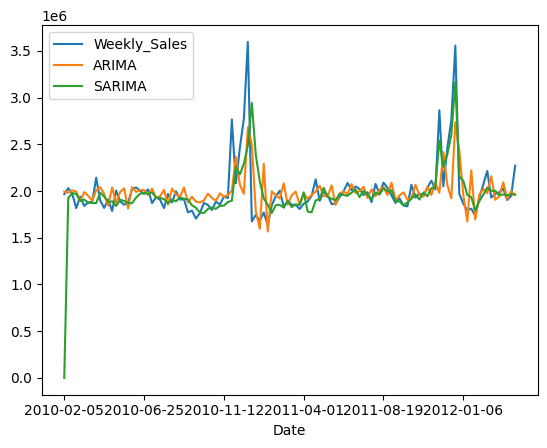

In [86]:
df_val[['Weekly_Sales', 'ARIMA','SARIMA']].plot()
plt.show()

## Auto Arima

In [87]:
from pmdarima import  auto_arima

In [88]:
auto_arima(df1.Weekly_Sales,seasonal=True,m=52,max_P=5,max_D=1,max_Q=2)

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 0, 0, 52),
      suppress_warnings=True)

In [89]:
model4 = SARIMAX(df1.Weekly_Sales, order=(2, 0, 2), seasonal_order=(1, 0, 0, 52))
aar_fit=model4.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

In [90]:
aar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1575.094
Date:                             Fri, 22 Dec 2023   AIC                           3162.187
Time:                                     17:01:21   BIC                           3178.604
Sample:                                 02-05-2010   HQIC                          3168.850
                                      - 04-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0826      0.846      0.098      0.922      -1.576       1.741
ar.L2          0.9004      0.859      1.048      0.295      -0.784       2.584
ma.L1          0.3591      0.881      0.407      0.684      -1.368       2.086
ma.L2         -0.4311      0.613     -0.704      0.482      -1.632       0.770
ar.S.L52       0.6332      0.072      8.790      0.000       0.492       0.774
sigma2      8.047e+10   3.35e-11   2.41e+21      0.000    8.05e+10    8.05e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):               629.68
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                            -0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+37. Standard errors may be unstable.
"""

In [91]:
df_val['AUTO_ARIMA'] = aar_fit.predict()

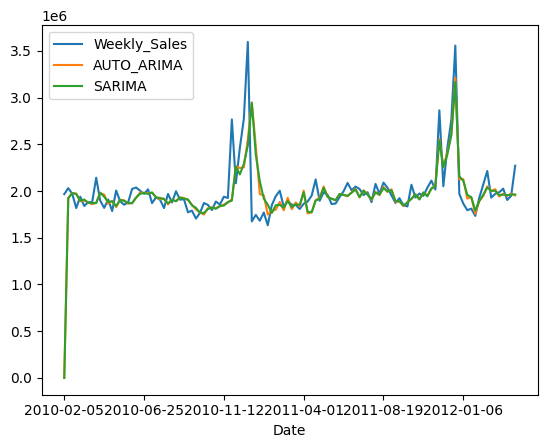

In [92]:
df_val[['Weekly_Sales', 'AUTO_ARIMA','SARIMA']].plot()
plt.show()

# Sarimax

In [93]:
df2.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1967220.53,31.53,2.666,0.0,0.0,0.0,0.0,0.0,126.442065,8.316,0
2010-02-12,2030933.46,33.16,2.671,0.0,0.0,0.0,0.0,0.0,126.496258,8.316,1
2010-02-19,1970274.64,35.70,2.654,0.0,0.0,0.0,0.0,0.0,126.526286,8.316,0
2010-02-26,1817850.32,29.98,2.667,0.0,0.0,0.0,0.0,0.0,126.552286,8.316,0
2010-03-05,1939980.43,40.65,2.681,0.0,0.0,0.0,0.0,0.0,126.578286,8.316,0


In [101]:
model5 = SARIMAX(df2.Weekly_Sales, order=(2, 0, 2), seasonal_order=(1, 0, 0, 52),exog=df2[['IsHoliday']])
aa_exo_fit=model5.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

In [102]:
aa_exo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1662.224
Date:                             Fri, 22 Dec 2023   AIC                           3338.449
Time:                                     17:08:06   BIC                           3357.602
Sample:                                 02-05-2010   HQIC                          3346.222
                                      - 04-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday   2.107e+06   3.63e-07   5.81e+12      0.000    2.11e+06    2.11e+06
ar.L1          0.0040      0.386      0.010      0.992      -0.753       0.761
ar.L2          0.9957      0.386      2.579      0.010       0.239       1.752
ma.L1          0.0108      0.591      0.018      0.985      -1.148       1.170
ma.L2         -0.9728      0.588     -1.654      0.098      -2.126       0.180
ar.S.L52       0.6161      0.141      4.359      0.000       0.339       0.893
sigma2       3.95e+11   2.01e-13   1.97e+24      0.000    3.95e+11    3.95e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):               504.40
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -1.95
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.64e+40. Standard errors may be unstable.
"""

In [103]:
df_val['AUTO_ARIMA_EXO'] = aa_exo_fit.predict()

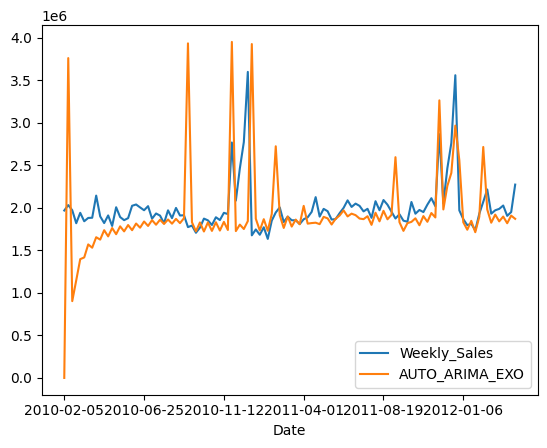

In [104]:
df_val[['Weekly_Sales', 'AUTO_ARIMA_EXO']].plot()
plt.show()

In [105]:
df_val.head()

,Weekly_Sales,SES,DES,TES,ARIMA,SARIMA,AUTO_ARIMA,AUTO_ARIMA_EXO
Date,,,,,,,,
2010-02-05,1967220.53,1.967221e+06,1.942244e+06,1.942244e+06,1.993550e+06,0.000000e+00,0.000000e+00,0.000000e+00
2010-02-12,2030933.46,1.967221e+06,1.951205e+06,1.951205e+06,1.982960e+06,1.923895e+06,1.924995e+06,3.758090e+06
2010-02-19,1970274.64,1.993209e+06,1.982383e+06,1.982383e+06,2.008331e+06,1.978186e+06,1.978141e+06,9.024388e+05
2010-02-26,1817850.32,1.983854e+06,1.976301e+06,1.976301e+06,1.993589e+06,1.968090e+06,1.973183e+06,1.147230e+06
2010-03-05,1939980.43,1.916140e+06,1.910839e+06,1.910839e+06,1.892878e+06,1.895386e+06,1.891293e+06,1.395608e+06


# Teste

In [109]:
test.head()

,Weekly_Sales,IsHoliday
Date,,
2012-04-13,2057637.86,0
2012-04-20,1955689.12,0
2012-04-27,1970121.65,0
2012-05-04,1995994.51,0
2012-05-11,2080764.17,0


<Axes: xlabel='Date'>

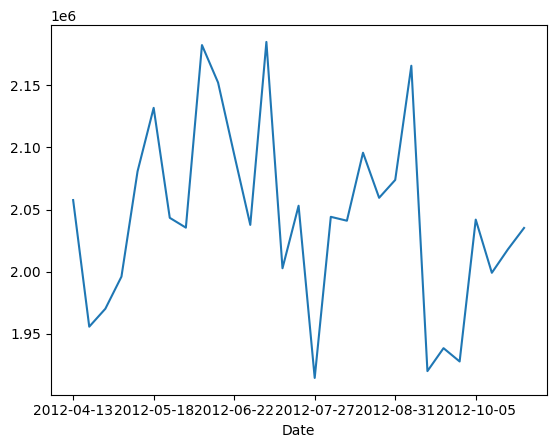

In [110]:
test.Weekly_Sales.plot()

In [128]:
predicao_ses=ses.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_des=des.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_tes=tes.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_ar_fit=ar_fit.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_aar_fit=aar_fit.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_sar_fit=sar_fit.predict(start=len(df1),end=len(df1)+len(test)-1)
predicao_aar_fit=aar_fit.predict(start=len(df1),end=len(df1)+len(test)-1)

In [151]:
predicao_aa_exo_fit= aa_exo_fit.predict(start=len(df1),end=len(df1)+len(test)-1, exog=test['IsHoliday'])

In [153]:
resultado=test[['Weekly_Sales']].copy()

In [154]:
resultado['sES']=predicao_ses
resultado['dES']=predicao_des
resultado['TES']=predicao_tes
resultado['ar_fit']=predicao_ar_fit
resultado['aar_fit']=predicao_aar_fit
resultado['sar_fit']=predicao_sar_fit
resultado['aar_fit']=predicao_aar_fit
resultado['aa_exo_fit']=predicao_aar_fit

In [155]:
resultado.head()

,Weekly_Sales,sES,dES,TES,ar_fit,aar_fit,sar_fit,aa_exo_fit
Date,,,,,,,,
2012-04-13,2057637.86,2.085874e+06,2.082436e+06,2.084088e+06,2.153236e+06,2.140316e+06,2.128690e+06,2.140316e+06
2012-04-20,1955689.12,2.085874e+06,2.081290e+06,2.258139e+06,2.081181e+06,2.251773e+06,2.226862e+06,2.251773e+06
2012-04-27,1970121.65,2.085874e+06,2.080144e+06,2.030321e+06,1.932403e+06,2.089898e+06,2.080419e+06,2.089898e+06
2012-05-04,1995994.51,2.085874e+06,2.078998e+06,2.121989e+06,2.036215e+06,2.147521e+06,2.128675e+06,2.147521e+06
2012-05-11,2080764.17,2.085874e+06,2.077852e+06,2.094216e+06,1.963779e+06,2.114746e+06,2.104662e+06,2.114746e+06


<Axes: xlabel='Date'>

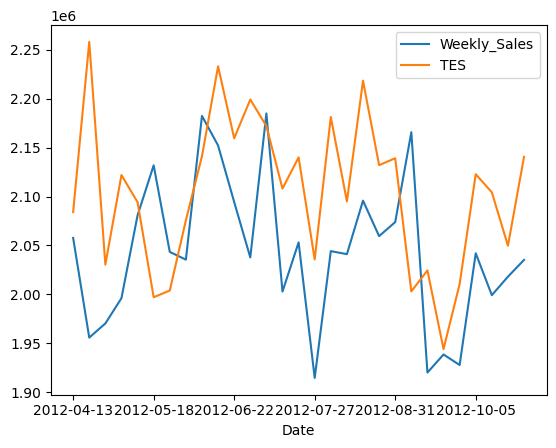

In [143]:
resultado[['Weekly_Sales','TES']].plot()

<Axes: xlabel='Date'>

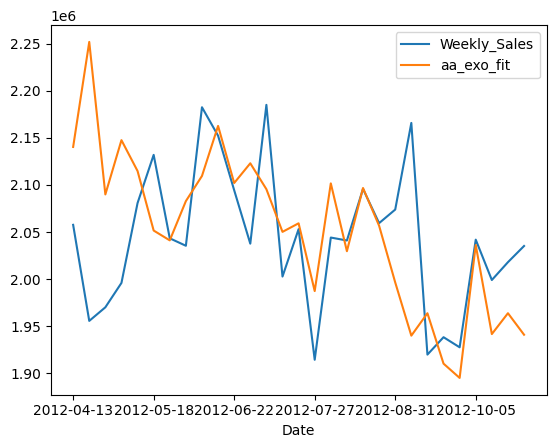

In [156]:
resultado[['Weekly_Sales','aa_exo_fit']].plot()

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(resultado['Weekly_Sales'], resultado['TES'])
mse = mean_squared_error(resultado['Weekly_Sales'], resultado['TES'])
rmse = np.sqrt(mse)

# Exibir métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 87901.98109335077
MSE: 11232051409.212275
RMSE: 105981.37293511664


In [158]:
mae_exo = mean_absolute_error(resultado['Weekly_Sales'], resultado['aa_exo_fit'])
mse_exo = mean_squared_error(resultado['Weekly_Sales'], resultado['aa_exo_fit'])
rmse_exo = np.sqrt(mse)

# Exibir métricas
print(f'MAE: {mae_exo}')
print(f'MSE: {mse_exo}')
print(f'RMSE: {rmse_exo}')

MAE: 65441.760856767294
MSE: 8597603961.959587
RMSE: 105981.37293511664
